# Welcome to Jupyter!

This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](../examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook

In [1]:
!pip install opencv-python numpy scipy imageio scikit-learn
!apt update && apt install -y libsm6 libxext6

    100% |████████████████████████████████| 26.6MB 1.4MB/s eta 0:00:01
Reading package lists... Done
E: List directory /var/lib/apt/lists/partial is missing. - Acquire (13: Permission denied)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy
import urllib

In [3]:
filename="lenna.tiff"
raw_image_data = urllib.request.urlopen("http://www.lenna.org/lena_std.tif").read()
fp = open(filename, "wb")
fp.write(raw_image_data)
fp.close()

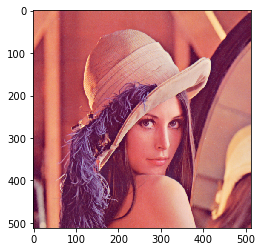

In [4]:
original_im = cv2.imread(filename, cv2.IMREAD_COLOR)
original_im = cv2.cvtColor(original_im, cv2.COLOR_BGR2RGB)
plt.imshow(original_im)

In [5]:
original_im.dtype, original_im.shape

(dtype('uint8'), (512, 512, 3))

In [6]:
original_im.sum()

100842898

In [7]:
numpy.random.randint(10,20)

11

In [8]:
def annealing_draw(original_im, current_im = None, max_circle_radius=100.0, round=1, cool_down_count=100):

  if current_im is None:
    # make gray image
    current_im = numpy.full(original_im.shape, 127, dtype=numpy.uint8)
    # current_im = numpy.zeros(original_im.shape, dtype=numpy.uint8)
    
  working_im = current_im.copy()
  current_diffrence = cv2.absdiff(original_im, current_im).sum()
  
  for r in range(round):
    failed_count = 0
    
    while 1:
      circle_image = working_im.copy()

      radius = numpy.random.randint(1, int(max_circle_radius + 2))
      center_x = numpy.random.randint(0, original_im.shape[0])
      center_y = numpy.random.randint(0, original_im.shape[1])      
      color_r = numpy.random.randint(0, 255)
      color_g = numpy.random.randint(0, 255)
      color_b = numpy.random.randint(0, 255)
      
      circle_image = cv2.circle(
          circle_image, 
          (center_x, center_y),
          radius,
          (color_r, color_g, color_b),
          -1
        )

      alpha = 0.3
      beta = 1 - alpha
      alphaed_im = cv2.addWeighted(circle_image, alpha, working_im, beta, 0)            

      annealing_diffrence = cv2.absdiff(original_im, alphaed_im).sum()
      
      if annealing_diffrence < current_diffrence:    
        current_diffrence = annealing_diffrence
        working_im = alphaed_im
        break
      else:
        failed_count += 1
        if failed_count > cool_down_count:
          failed_count = 0
          max_circle_radius *= 0.95


  return working_im, max_circle_radius, current_diffrence

100.0 38829432


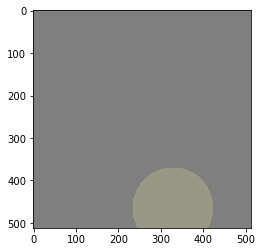

In [9]:
annealing_im, current_radius, diffrence = annealing_draw(original_im, None, round=1)
plt.imshow(annealing_im)
print(current_radius, diffrence)

Generation 100
100.0 29334458


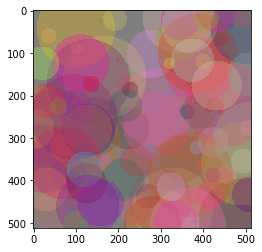

Generation 200
100.0 24021005


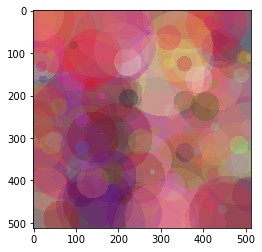

Generation 300
100.0 21701394


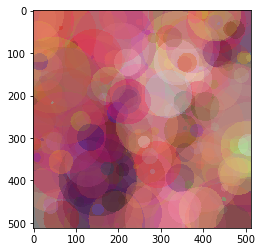

Generation 400
100.0 19945499


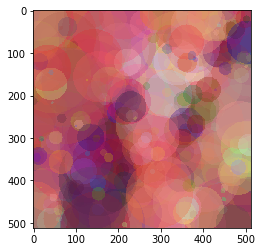

Generation 500
100.0 19013565


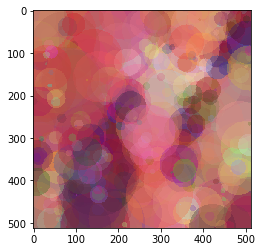

Generation 600
95.0 18218920


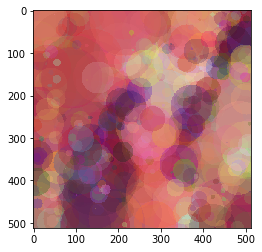

Generation 700
85.7375 17408204


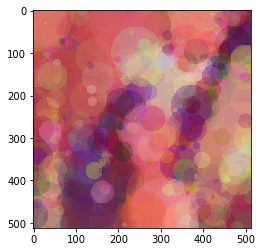

Generation 800
77.37809374999999 16695051


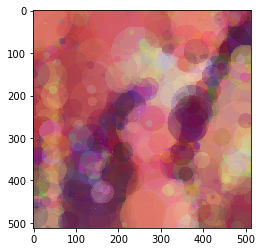

Generation 900
69.83372960937498 16217584


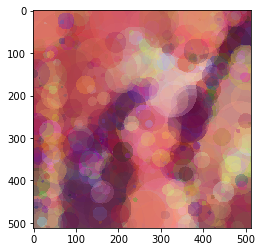

Generation 1000
63.02494097246091 15748816


Generation 1100
51.33420832795048 15327486


Generation 1200
48.76749791155295 14991147


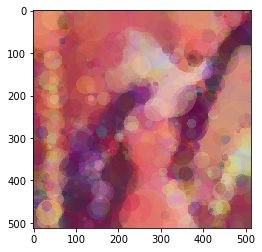

Generation 1300
46.3291230159753 14633391


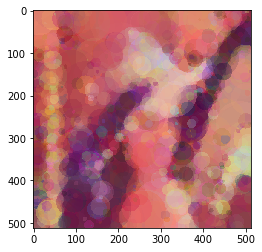

Generation 1400
41.812033521917705 14386636


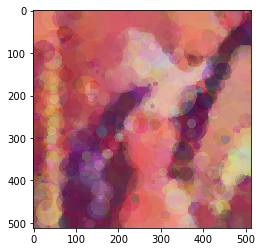

Generation 1500
37.73536025353073 14163593


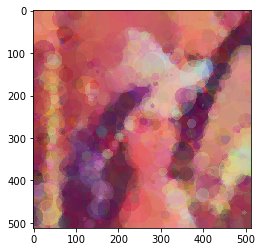

Generation 1600
37.73536025353073 13911267


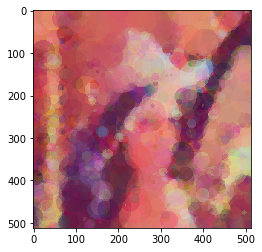

Generation 1700
34.05616262881148 13682855


Generation 1800
34.05616262881148 13400848


Generation 1900
30.735686772502355 13256092


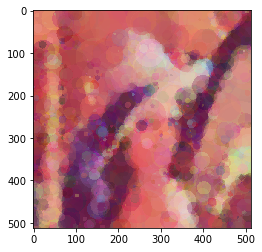

Generation 2000
27.738957312183373 13068516


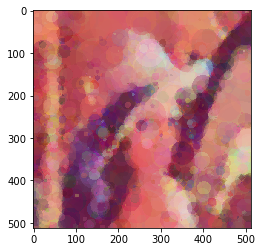

Generation 2100
27.738957312183373 12932674


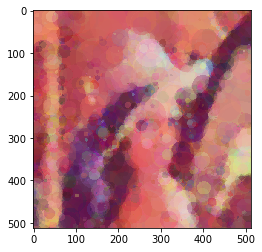

Generation 2200
25.034408974245494 12789585


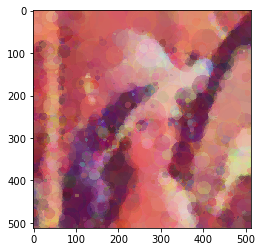

Generation 2300
23.782688525533217 12672384


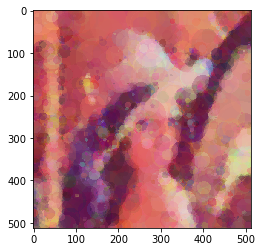

Generation 2400
22.593554099256554 12556404


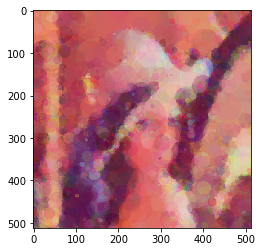

Generation 2500
22.593554099256554 12387464


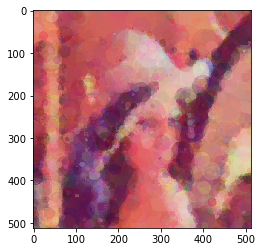

Generation 2600
19.371148445850082 12271532


Generation 2700
19.371148445850082 12175109


Generation 2800
15.777921478822675 12075668


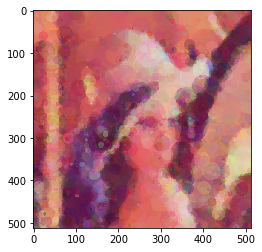

Generation 2900
15.777921478822675 11990034


Generation 3000
15.777921478822675 11895717


Generation 3100
14.98902540488154 11827358


Generation 3200
14.239574134637461 11745253


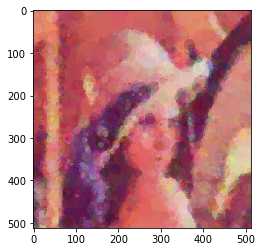

Generation 3300
13.527595427905588 11679473


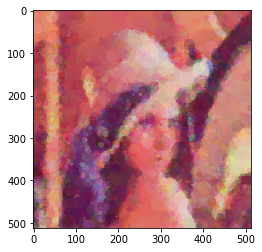

Generation 3400
13.527595427905588 11601027


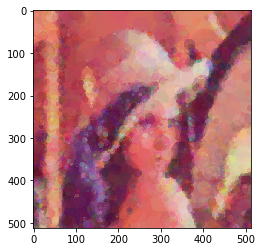

Generation 3500
12.851215656510307 11527383


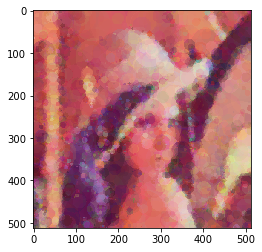

Generation 3600
12.208654873684791 11460222


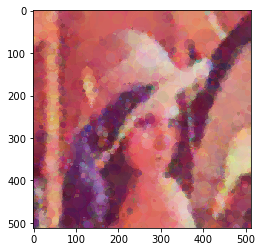

Generation 3700
12.208654873684791 11394044


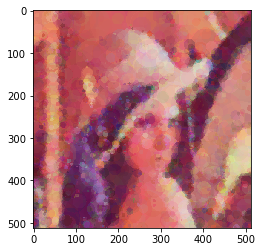

Generation 3800
12.208654873684791 11330565


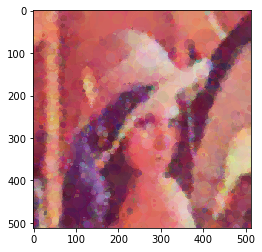

Generation 3900
11.59822213000055 11256137


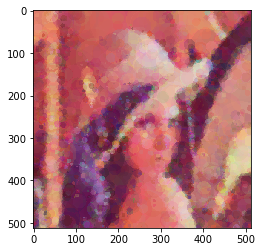

Generation 4000
11.59822213000055 11196953


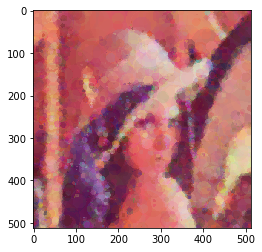

Generation 4100
11.018311023500523 11135872


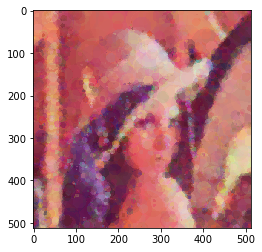

Generation 4200
10.467395472325496 11066272


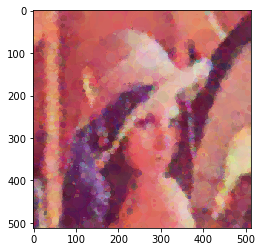

Generation 4300
10.467395472325496 10996048


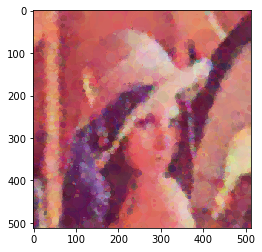

Generation 4400
10.467395472325496 10948383


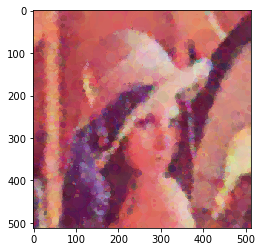

Generation 4500
9.94402569870922 10889696


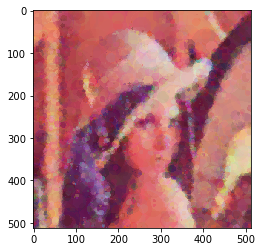

Generation 4600
9.44682441377376 10832834


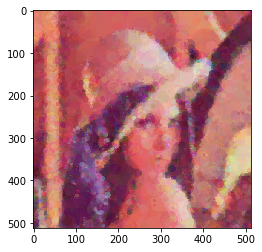

Generation 4700
9.44682441377376 10788008


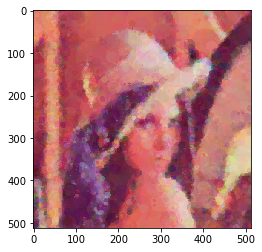

Generation 4800
8.97448319308507 10740708


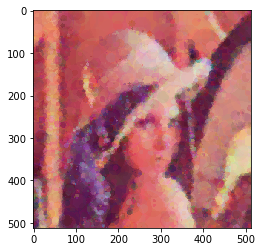

Generation 4900
8.525759033430816 10701052


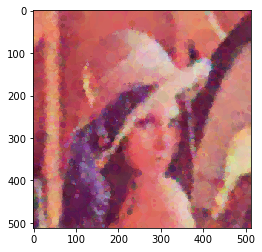

Generation 5000
8.099471081759274 10653965


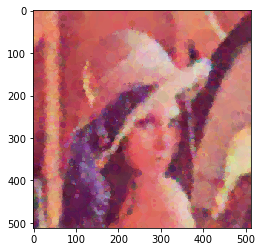

Generation 5100
7.69449752767131 10617258


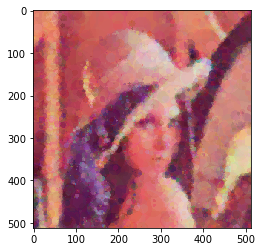

Generation 5200
7.69449752767131 10577153


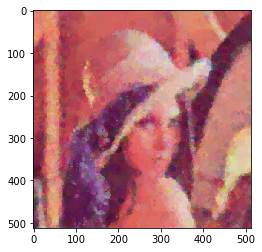

Generation 5300
7.309772651287744 10536023


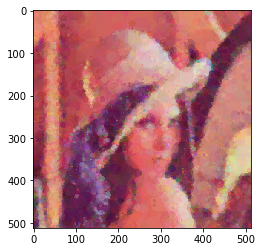

Generation 5400
7.309772651287744 10493931


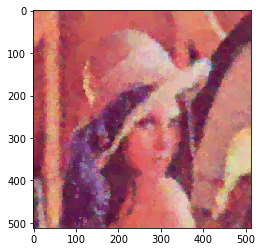

Generation 5500
6.944284018723357 10462340


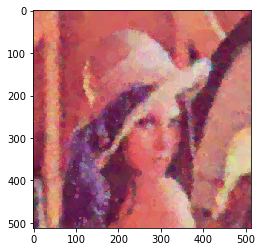

Generation 5600


In [ ]:
def next_generation():
  global annealing_im, current_radius
  annealing_im, current_radius ,diffrence= annealing_draw(original_im, annealing_im, current_radius, round=100)
  print(current_radius, diffrence)
  plt.imshow(annealing_im)
  plt.show()
  
for i in range(100):
  print("Generation", (i+1) * 100)
  next_generation()
